In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , models
import matplotlib.pyplot as plt

In [32]:
IMAGE_SIZE  = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plant_village",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2149 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [14]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 2 1 1 1 2 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 2 1 0 0]


In [18]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    

[[[146. 140. 152.]
  [144. 138. 150.]
  [141. 135. 147.]
  ...
  [146. 140. 152.]
  [147. 141. 153.]
  [147. 141. 153.]]

 [[142. 136. 148.]
  [141. 135. 147.]
  [140. 134. 146.]
  ...
  [147. 141. 153.]
  [147. 141. 153.]
  [148. 142. 154.]]

 [[143. 137. 149.]
  [142. 136. 148.]
  [141. 135. 147.]
  ...
  [148. 142. 154.]
  [148. 142. 154.]
  [149. 143. 155.]]

 ...

 [[103.  97. 111.]
  [106. 100. 114.]
  [100.  94. 108.]
  ...
  [118. 114. 128.]
  [105. 101. 115.]
  [ 99.  95. 109.]]

 [[102.  96. 110.]
  [106. 100. 114.]
  [102.  96. 110.]
  ...
  [109. 105. 119.]
  [105. 101. 115.]
  [ 93.  89. 103.]]

 [[102.  96. 110.]
  [108. 102. 116.]
  [102.  96. 110.]
  ...
  [100.  96. 110.]
  [121. 117. 131.]
  [120. 116. 130.]]]


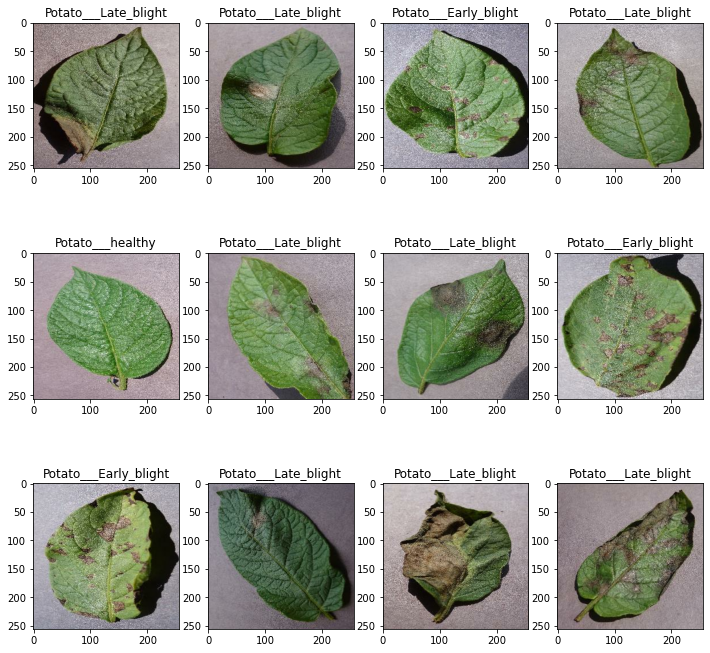

In [31]:
plt.figure(figsize = (12,12))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        #plt.axis("off")

In [33]:
training_ds = dataset.take(54)
test_ds = dataset.skip(54)

In [34]:
val_ds = test_ds.take(6)
test_ds= test_ds.skip(6)

In [36]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [37]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [40]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [41]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [43]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [45]:
history = model.fit(
    training_ds,
    epochs = EPOCHS,
    batch_size= BATCH_SIZE,
    verbose= 1,
    validation_data = val_ds
    
)

Epoch 1/50
54/54 [==============================] - 94s 2s/step - loss: 0.9128 - accuracy: 0.4861 - val_loss: 0.8541 - val_accuracy: 0.5573
Epoch 2/50
54/54 [==============================] - 96s 2s/step - loss: 0.7385 - accuracy: 0.6632 - val_loss: 0.7682 - val_accuracy: 0.6927
Epoch 3/50
54/54 [==============================] - 84s 2s/step - loss: 0.5274 - accuracy: 0.7946 - val_loss: 0.4995 - val_accuracy: 0.8021
Epoch 4/50
54/54 [==============================] - 94s 2s/step - loss: 0.3653 - accuracy: 0.8565 - val_loss: 0.4864 - val_accuracy: 0.8490
Epoch 5/50
54/54 [==============================] - 93s 2s/step - loss: 0.3202 - accuracy: 0.8837 - val_loss: 0.3859 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 81s 1s/step - loss: 0.2106 - accuracy: 0.9196 - val_loss: 0.1914 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 88s 2s/step - loss: 0.1915 - accuracy: 0.9294 - val_loss: 0.1695 - val_accuracy: 0.9375
Epoch 8/50
54/54 [==

In [46]:
score = model.evaluate(test_ds)
score

8/8 [==============================] - 3s 233ms/step - loss: 0.0686 - accuracy: 0.9869


[0.06855274736881256, 0.9868995547294617]

In [51]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
history.history['accuracy']


[0.4861111044883728,
 0.6631944179534912,
 0.7945601940155029,
 0.8564814925193787,
 0.8836805820465088,
 0.9195601940155029,
 0.9293981194496155,
 0.9583333134651184,
 0.9635416865348816,
 0.9693287014961243,
 0.9606481194496155,
 0.9618055820465088,
 0.96875,
 0.9791666865348816,
 0.9855324029922485,
 0.9716435074806213,
 0.9612268805503845,
 0.9866898059844971,
 0.9571759104728699,
 0.9774305820465088,
 0.9797453880310059,
 0.9866898059844971,
 0.9826388955116272,
 0.9832175970077515,
 0.9791666865348816,
 0.9866898059844971,
 0.9849537014961243,
 0.9884259104728699,
 0.9884259104728699,
 0.9930555820465088,
 0.9918981194496155,
 0.9901620149612427,
 0.9762731194496155,
 0.9913194179534912,
 0.9878472089767456,
 0.9936342835426331,
 0.9895833134651184,
 0.9988425970077515,
 0.9976851940155029,
 0.9971064925193787,
 0.9832175970077515,
 0.9953703880310059,
 0.9947916865348816,
 0.9884259104728699,
 0.9924768805503845,
 0.9947916865348816,
 0.9855324029922485,
 0.9600694179534912,
 0.

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

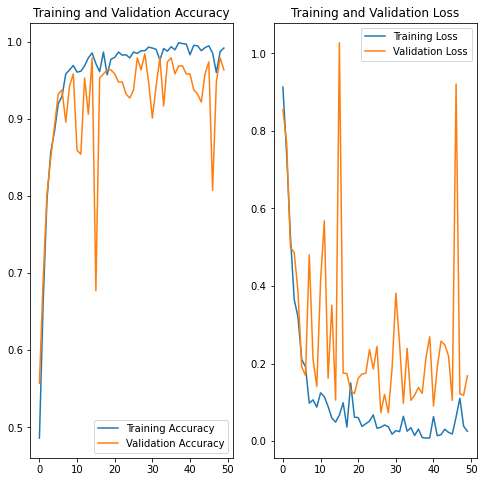

In [60]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 509ms/step
predicted label: Potato___Early_blight


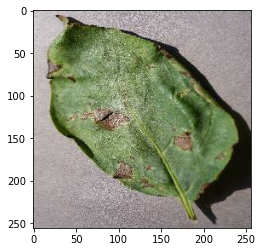

In [61]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [62]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


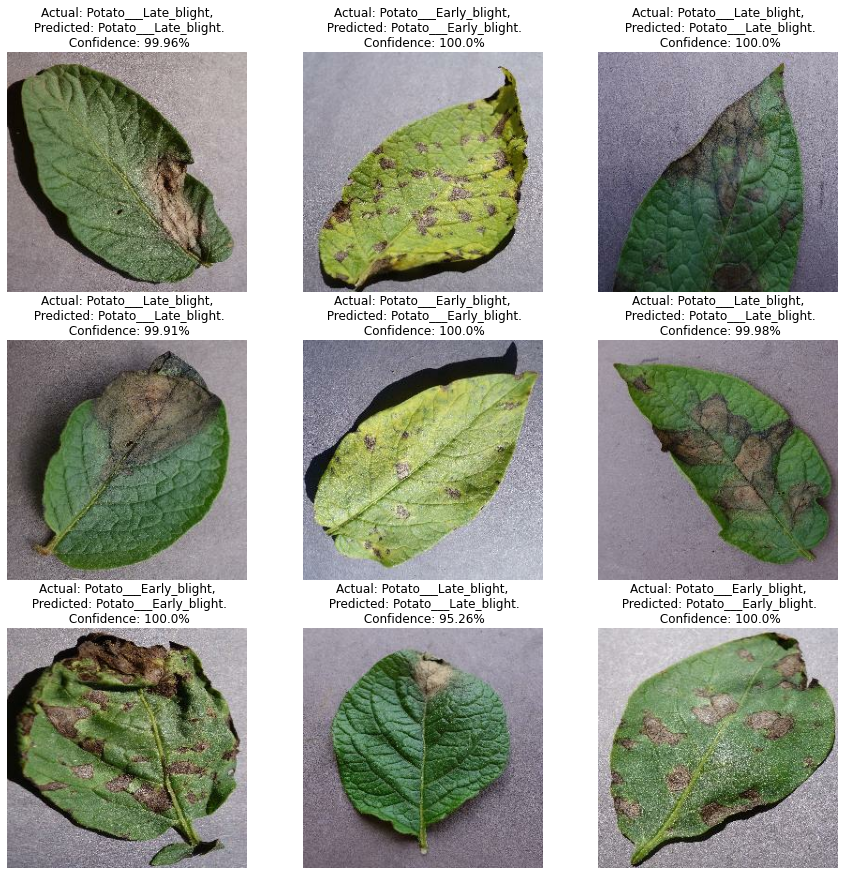

In [63]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")